In [19]:
library(ggplot2)
library(patchwork)


Call:
lm(formula = Sale_Price ~ Market_Val, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-282.171  -24.829    1.807   29.791  188.792 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.35868   13.76817   0.099    0.922    
Market_Val   1.40827    0.03693  38.132   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 68.76 on 74 degrees of freedom
Multiple R-squared:  0.9516,	Adjusted R-squared:  0.9509 
F-statistic:  1454 on 1 and 74 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


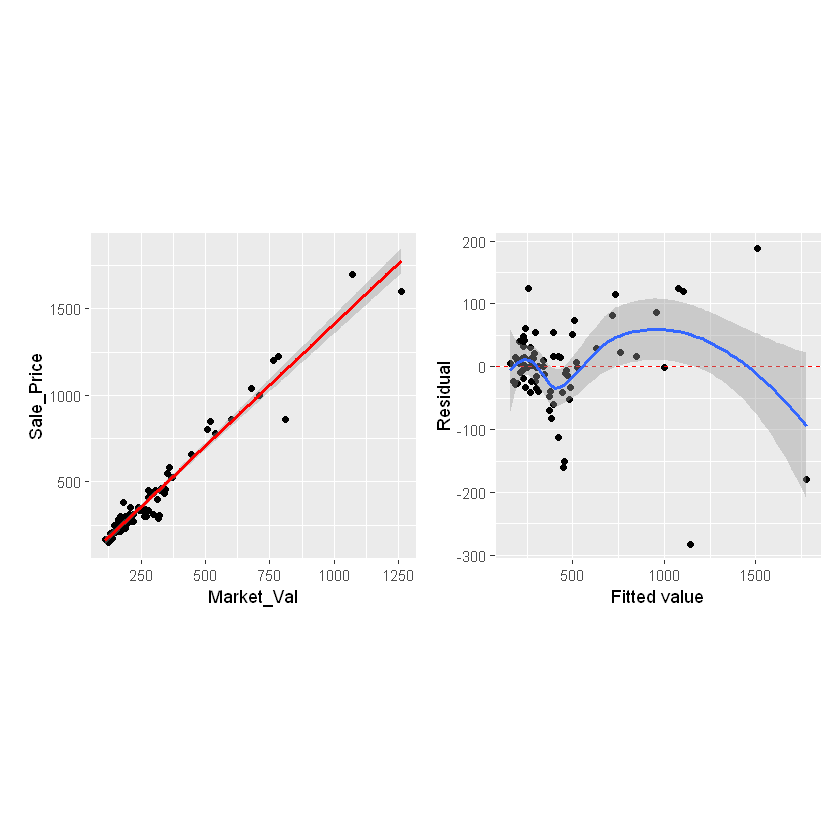

In [22]:
data <- read.csv("../dataset/TAMPALMS.csv", header = TRUE)

SLR <- lm(formula = Sale_Price ~ Market_Val, data = data)
summary(SLR)

fitted <- fitted.values(SLR)
res <- residuals(SLR)
std.res <- rstandard(SLR)

# Scatter plot:
scatter <- ggplot(data, aes(x = Market_Val, y = Sale_Price))
scatter <- scatter + geom_point()
scatter <- scatter + geom_smooth(method = lm, color = "red", se = TRUE)
scatter <- scatter + theme(aspect.ratio = 1)


# Residual-versus-fitted plot:
res.plot <- ggplot(data = data, aes(x = fitted, y = res))
res.plot <- res.plot + geom_point()
res.plot <- res.plot + geom_hline(yintercept = 0, col = "red", linetype = "dashed")
res.plot <- res.plot + stat_smooth(method = "loess")
res.plot <- res.plot + labs(x = "Fitted value", y = "Residual")
res.plot <- res.plot + theme(aspect.ratio = 1)

# Normality plot for residuals:


scatter + res.plot